# Sensors

In [1]:
import numpy as np
from jax import jit
from jax import numpy as jnp
from matplotlib import pyplot as plt

from jwave import FourierSeries
from jwave.acoustics import simulate_wave_propagation
from jwave.geometry import *
from jwave.geometry import Sensors, _circ_mask, _points_on_circle
from jwave.utils import show_field

domain = Domain((256, 256), (0.1e-3, 0.1e-3))
medium = Medium(domain=domain, sound_speed=1500.0)
time_axis = TimeAxis.from_medium(medium, cfl=0.3)

In [2]:
# Defining the initial pressure

N = domain.N
mask1 = _circ_mask(N, 16, (100, 100))
mask2 = _circ_mask(N, 10, (160, 120))
mask3 = _circ_mask(N, 20, (128, 128))
mask4 = _circ_mask(N, 60, (128, 128))
p0 = 5.0 * mask1 + 3.0 * mask2 + 4.0 * mask3 + 0.5 * mask4

p0 = 1.0 * jnp.expand_dims(p0, -1)
p0 = FourierSeries(p0, domain)

Text(0.5, 1.0, 'Initial pressure')

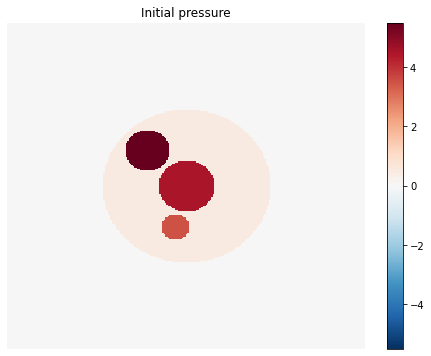

In [3]:
show_field(p0)
plt.title("Initial pressure")

In [12]:
num_sensors = 48
x, y = _points_on_circle(num_sensors, 100, (128, 128))
sensors_positions = (x, y)
sensors = Sensors(positions=sensors_positions)

print("Sensors parameters:")
Sensors.__annotations__

Sensors parameters:


{'positions': typing.Tuple[tuple]}

In [13]:
@jit
def compiled_simulator(medium, p0):
    a = simulate_wave_propagation(medium, time_axis, p0=p0, sensors=sensors)
    return a

In [14]:
sensors_data = compiled_simulator(medium, p0)[..., 0]

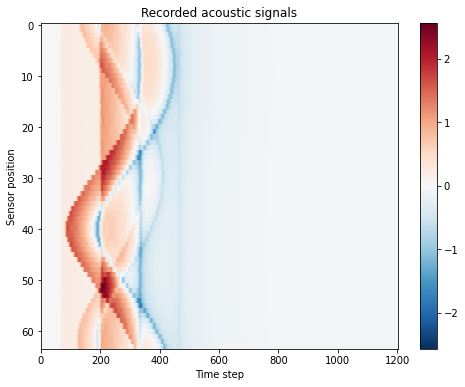

In [15]:
_field = FourierSeries(sensors_data.T, domain)
show_field(_field, "Recorded acoustic signals")
plt.xlabel("Time step")
plt.ylabel("Sensor position")
plt.axis("on")
plt.show()